### Student Information
Name: 田雷西

Student ID: s1113535

GitHub ID: Thewo-6

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# Read the data into a dataframe
import pandas as pd

df = pd.read_csv(
    "newdataset/Reddit-stock-sentiment.csv",
    engine="python",
    quotechar='"',
    escapechar="\\",
    on_bad_lines="skip"
)

print(df.shape)
print(df.columns)
print(df.head(2))

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   

                                    url  upvotes  downvotes  upvote_ratio  \
0  https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN           NaN   
1  https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN           NaN   

                                                text  subjectivity  polarity  \
0                                   Ca

In [2]:
# Narrowing down to relevant columns
df = df[["title", "text", "label"]]

# Combining title and text into a single column
df["combined_text"] = df["title"].fillna('') + " " + df["text"].fillna('')
df = df[["combined_text", "label"]]

In [3]:
# Drop rows with missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

df[:10]

,combined_text,label
0,Retardation is on the menu boys! WSB is so bac...,-1.0
1,Retail giant TARGET has now declined for 10 co...,0.0
2,How do you feel about a sitting president maki...,0.0
3,Who knows more? $VMAR Vision Marine Technologi...,1.0
4,The Trump administration is begging Xi Jinping...,-1.0
5,Weekend Discussion Thread for the Weekend of A...,0.0
6,Is the market in complete denial right now? Tr...,-1.0
7,Retardation is on the menu boys! WSB is so bac...,0.0
8,"It's fucking awful seeing the ""Silver"" misinfo...",1.0
9,Any cheap stocks under $10? HLGN is $10. Hurry...,1.0


In [4]:
# Remove URLs from the text
import re

df["combined_text"] = df["combined_text"].apply(
    lambda x: re.sub(r"http\S+|www.\S+", "", x)
)

# Collapse multiple spaces into one
df["combined_text"] = df["combined_text"].apply(
    lambda x: re.sub(r"\s+", " ", x).strip()
)

df[:5]

,combined_text,label
0,Retardation is on the menu boys! WSB is so bac...,-1.0
1,Retail giant TARGET has now declined for 10 co...,0.0
2,How do you feel about a sitting president maki...,0.0
3,Who knows more? $VMAR Vision Marine Technologi...,1.0
4,The Trump administration is begging Xi Jinping...,-1.0


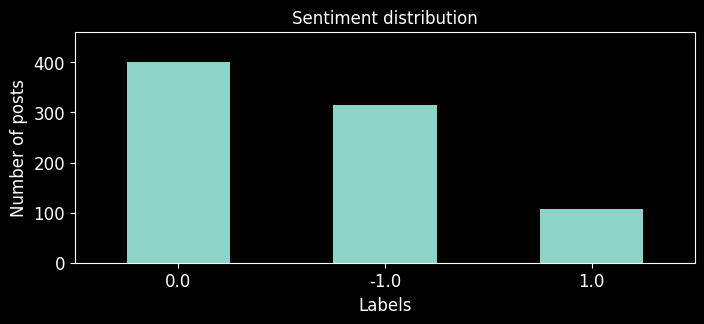

In [5]:
import matplotlib.pyplot as plt
df.label.value_counts()

# plot barchart for X_sample
with plt.style.context('dark_background'):
    df.label.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, df.label.value_counts().max() + 60], 
                                           rot = 0, fontsize = 12, figsize = (8,3))
    plt.xlabel('Labels', fontsize = 12)
    plt.ylabel('Number of posts', fontsize = 12)
    plt.show()

In [ ]:
# Tokenization
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Maxal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [11]:
import helpers.data_mining_helpers as dmh
df['unigrams'] = df['combined_text'].apply(lambda x: dmh.tokenize_text(x))

df[:5]["unigrams"]

0    [Retardation, is, on, the, menu, boys, !, WSB,...
1    [Retail, giant, TARGET, has, now, declined, fo...
2    [How, do, you, feel, about, a, sitting, presid...
3    [Who, knows, more, ?, $, VMAR, Vision, Marine,...
4    [The, Trump, administration, is, begging, Xi, ...
Name: unigrams, dtype: object

In [31]:
# Creating a Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.combined_text) # learn the vocabulary and return document-term matrix
print(df_counts.shape)

(824, 4506)


In [17]:
count_vect.get_feature_names_out()[3363]

'retardation'

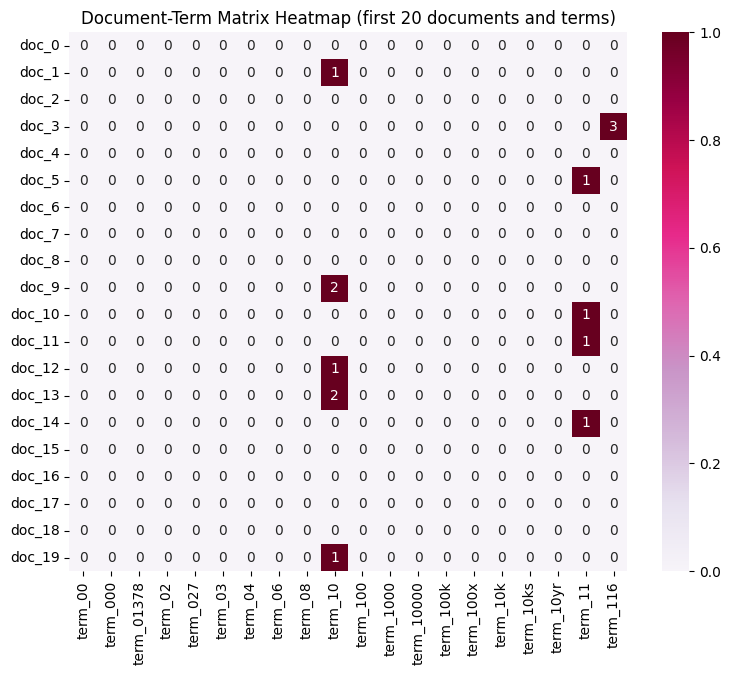

In [29]:
# Visualizing the Document-Term Matrix
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y);
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True);
ax.set_title('Document-Term Matrix Heatmap (first 20 documents and terms)');
plt.show()

In [30]:
# Calculating Term Frequencies
import numpy as np

term_frequencies = []
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [ ]:
# Visualizing the Top 50 Most Frequent Terms
import plotly.express as px

# Get sorted indices in descending order of frequency
top_idx = np.argsort(term_frequencies)[::-1][:100]

# Get top terms and their frequencies
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

df_top_50 = pd.DataFrame({"Term": top_terms[:50], "Total frequency": top_freqs[:50]})

g = px.bar(
    df_top_50,
    x="Term",
    y="Total frequency",
    title="Top 50 Most Frequent Terms"
)
g.update_layout(xaxis_tickangle=-90, bargap=0.15, height=420, width=1000, xaxis_tickfont=dict(size=10))
#g.update_xaxes(tickmode='array', tickvals=list(range(0, 300, 10)), ticktext=count_vect.get_feature_names_out()[:300][::10])
g.show()

# Phase 2